In [16]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
df=pd.read_csv("ellipse_Dataset.csv")
x = df['x'].values
y = df['y'].values
r=pow((x*x+y*y),0.5)
theta=np.arctan(y/x)

In [17]:
def mse_lossSquare(params,theta,r): 
    a,b= params 
    noise = r - pow((a*np.cos(theta))**2+(b*np.sin(theta))**2,0.5)
    mseSqr= noise**2
    return np.mean(mseSqr)


In [25]:
initial_guess = [0.1,0.1] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(theta,r)) 
a,b= result_mse.x 
print(a,b)


4.662368333965192 7.663288385205996


C:\Users\PRINCE\AppData\Local\Temp\ipykernel_15252\2229847784.py:3: RuntimeWarning: invalid value encountered in sqrt
  y1 = b*pow((1-(x/a)**2),0.5)
C:\Users\PRINCE\AppData\Local\Temp\ipykernel_15252\2229847784.py:4: RuntimeWarning: invalid value encountered in sqrt
  y2 = -b*pow((1-(x/a)**2),0.5)


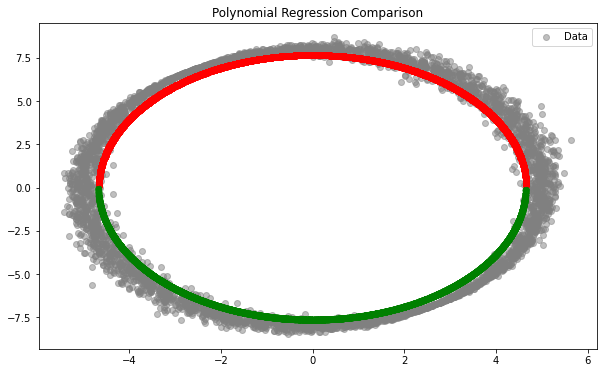

In [27]:
import matplotlib.pyplot as plt
x_range = np.linspace(df['x'].min(), df['x'].max(), 2000)
y1 = b*pow((1-(x/a)**2),0.5) 
y2 = -b*pow((1-(x/a)**2),0.5) 

plt.figure(figsize=(10,6)) 
plt.scatter(df['x'], df['y'], color='gray', alpha=0.5, label='Data') 
plt.scatter(x, y1, color='red', label='') 
plt.scatter(x, y2, color='green', label='', linestyle='--') 
plt.legend() 
plt.title("Polynomial Regression Comparison") 
plt.show() 